In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import comb

# DISCRETE RANDOM DISTRIBUTION
1. Poisson distribution
2. Geometric distribution
3. Binomial distribution

## Observation

### 1. Poisson distribution
10 intervals ([0,1],[2,3],…, [16,17], [18~∞])

In [16]:
def poisson_observation(lamb, T, n, num_intervals):
    observed = []
    poisson = []
    
    # Create the interval
    for i in range(num_intervals):
        observed.append(0)
    
    #print(len(observed))
    
    for i in range(n):
        z = 1
        m = 0
        while(1):
            m += 1
            z = z*np.random.uniform(0,1,1)
            if (z <= np.exp(-lamb*T)):
                break
            else:
                pass
        k = m - 1
        poisson.append(k)
        # Add to the interval
        # Because k is an integer so we can use the method below to add k to the suitable interval
        if (k>18):
            observed[num_intervals - 1] += 1
        else:
            index = int(k/2)
            observed[index] += 1
    
    return poisson, observed

[8615, 66401, 147058, 150138, 85653, 32006, 8355, 1535, 203, 36]


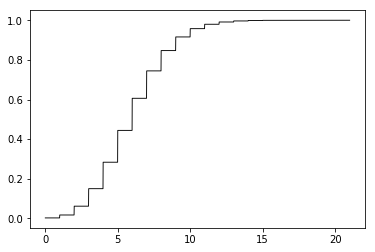

In [3]:
data_observed, data_count = poisson_observation(1, 6, 500000, 10)
print(data_count)

# Choose how many bins you want here
num_bins = 2000
# Use the histogram function to bin the data
counts, bin_edges = np.histogram(data_observed, bins=num_bins, normed=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1], color = 'k', linewidth = 0.9)

plt.show()

### 2. Geometric distribution
10 intervals ([1,2],[3,4],…, [17,18], [19~∞])

In [17]:
def geometric_observation(p, n, num_intervals):
    observed = []
    geometric = []
    
    # Create the intervals
    for i in range(num_intervals):
        observed.append(0)
    
    for i in range(n):
        k = 1
        while (1):
            z = np.random.uniform(0,1,1)
            if (z <= p):
                break
            else:
                k += 1
        geometric.append(k)
        
        # Add to the intervals
        if (k>19):
            observed[num_intervals - 1] += 1
        else:
            index = int((k-1)/2)
            observed[index] += 1
    
    return geometric, observed

[255274, 125440, 60976, 29714, 14593, 7090, 3499, 1756, 851, 807]


c:\users\phan nguyen vu (vpi)\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  import sys


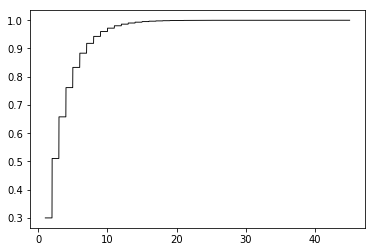

In [7]:
data_observed, data_count = geometric_observation(0.3, 500000, 10)
print(data_count)

# Choose how many bins you want here
num_bins = 2000
# Use the histogram function to bin the data
counts, bin_edges = np.histogram(data_observed, bins=num_bins, normed=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1], color = 'k', linewidth = 0.9)

plt.show()

### 3. Binomial distribution
10 intervals [0,1), [1,2), ..., [8,9), [9, $\infty$]

In [18]:
def binomial_observation(p, nb, n, num_intervals):
    observed = []
    binomial = []
    
    # Create the intervals
    for i in range(num_intervals):
        observed.append(0)
    
    for i in range(n):
        z = np.random.uniform(0,1,nb)
        k = 0
        for i in range(nb):
            if (z[i]<p):
                k += 1
            else:
                pass
        binomial.append(k)
        
        # Add to the intervals
        if(k >= (num_intervals - 1)):
            observed[(num_intervals - 1)] += 1
        else:
            index = int(k)
            observed[index] += 1
    
    return binomial, observed

[414, 3504, 14054, 35609, 65095, 89595, 95576, 81877, 57457, 56819]


c:\users\phan nguyen vu (vpi)\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  import sys


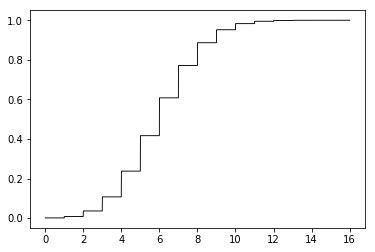

In [49]:
data_observed, data_count = binomial_observation(0.3, 20, 500000, 10)
print(data_count)

# Choose how many bins you want here
num_bins = 2000
# Use the histogram function to bin the data
counts, bin_edges = np.histogram(data_observed, bins=num_bins, normed=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1], color = 'k', linewidth = 0.9)

plt.show()

## Estimation

### 1. Poisson distribution

In [19]:
# Calculate factor
def factor(n):
    temp = 1    
    if n == 0:
        temp = 1
    elif n == 1:
        temp = 1
    else:
        for i in range(2, n+1):
            temp = temp*i
    
    return temp

In [20]:
def poisson_estimation(lamb, T, n, num_intervals):
    estimated = []
    
    # Add to intervals
    index = 0
    while (index < 2*num_intervals-1):
        estimated.append(n*(((lamb*T)**index)*np.exp(-lamb*T)/factor(index) + ((lamb*T)**(index+1))*np.exp(-lamb*T)/factor(index+1)))
        index += 2
    
    return estimated

In [21]:
data_count = poisson_estimation(1, 6, 500000, 10)
print(data_count)

[8675.632618332254, 66926.30876999168, 147237.87929398168, 149150.0595445529, 86048.11127570359, 31916.026727715514, 8231.735400361016, 1559.6972337526133, 226.0905653969124, 25.868485743353826]


### 2. Geometric distribution

In [22]:
def geometric_estimation(p, n, num_intervals):
    estimated = []
    
    # Add to intervals
    index = 1
    for i in range(num_intervals - 1):
        estimated.append(n*(((1-p)**(index-1))*p + ((1-p)**(index))*p))
        index += 2
    index -= 1
    estimated.append(n*((1-p)**index))
    
    return estimated

In [3]:
data_count = geometric_estimation(0.3, 500000, 10)
print(data_count)

[255000.0, 124949.99999999997, 61225.49999999998, 30000.494999999988, 14700.242549999992, 7203.118849499995, 3529.528236254997, 1729.4688357649482, 847.4397295248247, 814.2067989552236]


### 3. Binomial distribution

In [23]:
def binomial_estimation(p, nb, n, num_intervals):
    estimated = []
    
    # Add to intervals
    for i in range(num_intervals - 1):
        estimated.append(n*(comb(nb, i)*(p**i)*((1-p)**(nb-i))))
    # For the intervals [9, 20]
    last = 0
    for i in range(9, 21):
        last = last + n*(comb(nb, i)*(p**i)*((1-p)**(nb-i)))
    estimated.append(last)
    
    return estimated

In [24]:
data_count = binomial_estimation(0.3, 20, 500000, 10)
print(data_count)

[398.9613314880595, 3419.668555611939, 13922.936262134319, 35801.83610263111, 65210.48718693524, 89431.52528493978, 95819.49137672118, 82130.99260861817, 57198.3698524305, 56665.73143848914]


# CONTINUOUS RANDOM DISTRIBUTION
1. Exponential distribution
2. Normal distribution

## Observation

### 1. Exponential distribution
Generate exponential distribution from uniform distribution.

$y = -\displaystyle\frac{1}{\lambda}ln(z)$

where $z$ is a r.v. w.r.t. uniform distribution.

In [105]:
def exponential_observation(lamb, n, num_intervals):
    observed = []
    
    z = np.random.uniform(0, 1, n) # uniform r.v.
    exp = -(1/lamb)*np.log(z)
    
    # Create the interval
    for i in range(num_intervals):
        observed.append(0)
    
    # Count the observed
    for i in range(n):
        index = int(exp[i])
        if index > (len(observed) - 1):
            observed[len(observed) - 1] += 1
        else:
            observed[index] +=1
    
    return exp, observed

Test the observation of the exponential distribution.


[316007, 116101, 42983, 15751, 5810, 2080, 789, 292, 116, 71]


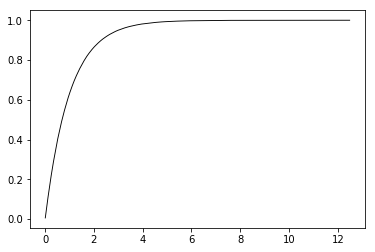

In [6]:
data_observed, data_count = exponential_observation(1, 500000, 10)
print(data_count)

# Choose how many bins you want here
num_bins = 2000
# Use the histogram function to bin the data
counts, bin_edges = np.histogram(data_observed, bins=num_bins, normed=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1], color = 'k', linewidth = 0.9)

plt.show()

### 2. Normal distribution
Rejection method for generating the normal distribution.
1. Generate $z_1$, and then let $x = -ln(z_1)$ (the exponential distribution with $\lambda = 1$)
2. Generate $z_2$
3. If $z_2 > e^{-(x-1)^2/x}$, then go to 1
4. Generate $z_3$ (to decide left or right after accepted)
5. If $z_3 > 0.5$, then return $\mu + \sigma x$, else return $\mu - \sigma x$

In [106]:
def normal_observation(mu, sigma, n, intervals):
    observed = []
    normal = []
    temp = 0
    
    for i in range(len(intervals) + 1):
        observed.append(0)
        
    # Generate the random number following the normal distribution using the rejection method
    for i in range(n):
        while(1):
            z1 = np.random.uniform(0, 1, 1)
            x = -np.log(z1)
            z2 = np.random.uniform(0, 1, 1)
            if (z2 < np.exp((-(x-1)**2)/2)):
                break
        
        z3 = np.random.uniform(0, 1, 1)
        if (z3>0.5):
            temp = mu + sigma*x
        else:
            temp = mu - sigma*x
        normal.append(temp)
            
        # Add to the observed list
        if (temp > intervals[(len(intervals) - 1)]):
            observed[(len(intervals))] += 1
        else:
            for j in range(len(intervals)):
                if (temp < intervals[j]):
                    observed[j] += 1
                    break
    
    return normal, observed

Test the observation of the normal distribution

[11396, 21948, 45793, 75214, 95661, 95429, 75330, 45912, 22036, 11281]


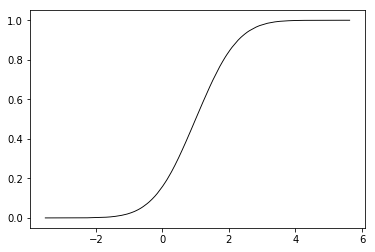

In [8]:
data_observed, data_count = normal_observation(1, 1, 500000, [-1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3])
print(data_count)

# Choose how many bins you want here
num_bins = 2000
# Use the histogram function to bin the data
counts, bin_edges = np.histogram(data_observed, bins=num_bins, normed=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1], color = 'k', linewidth = 0.9)

plt.show()

## Estimation

### 1. Exponential distribution
The CDF of the exponential distribution

$F(t) = 1 - e^{-\lambda t}$

So, the counting of estimation is following the formula below

$[a,b) = N\times (F(b) - F(a)) = N\times (e^{-\lambda a} - e^{-\lambda b})$

In [107]:
def exponential_estimation(lamb, n, num_intervals):
    estimated = []
    
    for i in range(num_intervals - 1):
        estimated.append(n*(np.exp(-lamb*i) - np.exp(-lamb*(i+1))))
    estimated.append(n - sum(estimated))
    
    return estimated

In [10]:
data_count = exponential_estimation(1, 500000, 10)
print(data_count)

[316060.2794142788, 116272.07896741481, 42774.107434374375, 15735.714739564883, 5788.845944824356, 2129.597411209554, 783.435105555921, 288.20966882600214, 106.02641190791614, 61.704902043391485]


### 2. Normal distribution
To find $F_Z(z)$, we use the method <code>norm.cdf(z)</code>

In [108]:
def normal_estimation(mu, sigma, intervals, n):
    estimated = []
    a = 0
    b = 0
    
    # [-inf, intervals[0])
    b = (intervals[0] - mu)/sigma
    estimated.append(n*norm.cdf(b))
    
    # [intervals[0], intervals[1]), ..., [intervals[k-1], intervals[k])
    for i in range(0, len(intervals) - 1):
        a = (intervals[i] - mu)/sigma
        b = (intervals[i+1] - mu)/sigma
        estimated.append(n*(norm.cdf(b) - norm.cdf(a)))
    
    # [intervals[k], inf)
    a = (intervals[len(intervals) - 1] - mu)/sigma
    estimated.append(n*(1 - norm.cdf(a)))
    
    return estimated

In [12]:
data_count = normal_estimation(1, 1, [-1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3], 500000)
print(data_count)

[11375.065974089597, 22028.53466033944, 45924.0263312995, 74941.1423972649, 95731.23063700656, 95731.23063700656, 74941.1423972649, 45924.026331299494, 22028.53466033944, 11375.065974089604]


# CHECKING DISTRIBUTION

In [9]:
def chi_squared_test(observation, estimation):
    observation = np.array(observation, dtype = float)
    estimation = np.array(estimation, dtype = float)
    diff_norm = np.divide(np.square(estimation - observation), estimation)
    chi_squared = np.sum(diff_norm)
    
    return diff_norm, chi_squared

*Calculate CDF*

In [140]:
def cdf_calculation(obs, est):
    # Calculate the CDF
    observed_cdf = []
    estimated_cdf = []
    observed_cdf.append(obs[0]/500000)
    estimated_cdf.append(est[0]/500000)
    for i in range(1, len(obs)):
        observed_cdf.append(obs[i]/500000.0 + observed_cdf[i-1])
        estimated_cdf.append(est[i]/500000.0 + observed_cdf[i-1])
    
    return observed_cdf, estimated_cdf

### 1. Exponential distribution

In [112]:
exp_observed, exp_observation = exponential_observation(1, 500000, 10)
exp_estimation = exponential_estimation(1, 500000, 10)
diff_norm, chi_squared = chi_squared_test(exp_observation, exp_estimation)
print(exp_observation)
print(exp_estimation)
print(diff_norm)
print(chi_squared)

[315902, 116190, 42970, 15801, 5747, 2138, 792, 296, 108, 56]
[316060.2794142788, 116272.07896741481, 42774.107434374375, 15735.714739564883, 5788.845944824356, 2129.597411209554, 783.435105555921, 288.20966882600214, 106.02641190791614, 61.704902043391485]
[0.07926454 0.05794131 0.89712912 0.27085933 0.30249261 0.03315345
 0.0936356  0.2105733  0.0367366  0.52744444]
2.509230295962819


In [141]:
for i in range(2):
    print(cdf_calculation(exp_observation, exp_estimation)[i])
    print()

[0.631804, 0.8641840000000001, 0.9501240000000001, 0.9817260000000001, 0.9932200000000001, 0.997496, 0.9990800000000001, 0.9996720000000001, 0.9998880000000001, 1.0]

[0.6321205588285576, 0.8643481579348297, 0.9497322148687488, 0.9815954294791298, 0.9933036918896488, 0.9974791948224192, 0.9990628702111118, 0.999656419337652, 0.999884052823816, 1.0000114098040869]



### 2. Normal distribution

In [116]:
norm_observed, norm_observation = normal_observation(1, 1, 500000, [-1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3])
norm_estimation = normal_estimation(1, 1, [-1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3], 500000)
diff_norm, chi_squared = chi_squared_test(norm_observation, norm_estimation)
print(norm_observation)
print(norm_estimation)
print(diff_norm)
print(chi_squared)

[11343, 21944, 45796, 74801, 95708, 95776, 75090, 45943, 22157, 11442]
[11375.065974089597, 22028.53466033944, 45924.0263312995, 74941.1423972649, 95731.23063700656, 95731.23063700656, 74941.1423972649, 45924.026331299494, 22028.53466033944, 11375.065974089604]
[0.09039303 0.32440237 0.35690994 0.26207089 0.00563727 0.0209367
 0.29567985 0.00783904 0.74918027 0.39385827]
2.506907616790629


### 3. Poisson distribution

In [42]:
p_observed, p_observation = poisson_observation(1, 6, 500000, 10)
p_estimation = poisson_estimation(1, 6, 500000, 10)
diff_norm, chi_squared = chi_squared_test(p_observation, p_estimation)
print(p_observation)
print(p_estimation)
print(diff_norm)
print(chi_squared)

[8573, 66743, 147484, 149095, 86062, 32037, 8216, 1530, 234, 26]
[8675.632618332254, 66926.30876999168, 147237.87929398168, 149150.0595445529, 86048.11127570359, 31916.026727715514, 8231.735400361016, 1559.6972337526133, 226.0905653969124, 25.868485743353826]
[1.21414251e+00 5.02076176e-01 4.11411807e-01 2.03255262e-02
 2.24173035e-03 4.58532409e-01 3.00790553e-02 5.65446725e-01
 2.76699541e-01 6.68612762e-04]
3.4816240896671813


In [142]:
for i in range(2):
    print(cdf_calculation(p_observation, p_estimation)[i])
    print()

[0.017146, 0.150632, 0.4456, 0.74379, 0.9159139999999999, 0.9799879999999999, 0.9964199999999999, 0.9994799999999998, 0.9999479999999998, 0.9999999999999999]

[0.01735126523666451, 0.15099861753998337, 0.44510775858796336, 0.7439001190891058, 0.9158862225514071, 0.979746053455431, 0.9964514708007219, 0.9995393944675051, 0.9999321811307936, 0.9999997369714866]



### 4. Geometric distribution

In [123]:
geo_observed, geo_observation = geometric_observation(0.3, 500000, 10)
geo_estimation = geometric_estimation(0.3, 500000, 10)
diff_norm, chi_squared = chi_squared_test(geo_observation, geo_estimation)
print(geo_observation)
print(geo_estimation)
print(diff_norm)
print(chi_squared)

[255105, 124656, 61290, 30065, 14790, 7255, 3482, 1726, 839, 792]
[255000.0, 124949.99999999997, 61225.49999999998, 30000.494999999988, 14700.242549999992, 7203.118849499995, 3529.528236254997, 1729.4688357649482, 847.4397295248247, 814.2067989552236]
[0.04323529 0.69176471 0.06794963 0.13869421 0.54804537 0.37367893
 0.64000996 0.00695752 0.08405204 0.60567158]
3.200059249783531


In [143]:
for i in range(2):
    print(cdf_calculation(geo_observation, geo_estimation)[i])
    print()

[0.51021, 0.759522, 0.882102, 0.9422320000000001, 0.9718120000000001, 0.9863220000000001, 0.9932860000000001, 0.9967380000000001, 0.9984160000000001, 1.0]

[0.51, 0.7601100000000001, 0.881973, 0.94210299, 0.9716324851, 0.9862182376990001, 0.9933810564725102, 0.99674493767153, 0.9984328794590498, 1.0000444135979105]



### 5. Binomial distribution

In [125]:
bino_observed, bino_observation = binomial_observation(0.3, 20, 500000, 10)
bino_estimation = binomial_estimation(0.3, 20, 500000, 10)
diff_norm, chi_squared = chi_squared_test(bino_observation, bino_estimation)
print(bino_observation)
print(bino_estimation)
print(diff_norm)
print(chi_squared)

[399, 3448, 13906, 36023, 65276, 89271, 95852, 82167, 56923, 56735]
[398.9613314880595, 3419.668555611939, 13922.936262134319, 35801.83610263111, 65210.48718693524, 89431.52528493978, 95819.49137672118, 82130.99260861817, 57198.3698524305, 56665.73143848914]
[3.74786652e-06 2.34721795e-01 2.06017588e-02 1.36622796e+00
 6.58165406e-02 2.88135163e-01 1.10291818e-02 1.57861508e-02
 1.32571183e+00 8.46743436e-02]
3.4127084720564933


In [144]:
for i in range(2):
    print(cdf_calculation(bino_observation, bino_estimation)[i])
    print()

[0.000798, 0.007694, 0.035506, 0.10755200000000001, 0.238104, 0.416646, 0.6083500000000001, 0.772684, 0.88653, 1.0]

[0.000797922662976119, 0.007637337111223878, 0.035539872524268636, 0.10710967220526221, 0.2379729743738705, 0.4169670505698796, 0.6082849827534424, 0.7726119852172364, 0.887080739704861, 0.9998614628769783]



# PLOTTING CONTINUOUS CDF

In [127]:
def cdf_plotting(observed, name):
    # Choose how many bins you want here
    num_bins = 500000
    # Use the histogram function to bin the data
    counts, bin_edges = np.histogram(observed, bins=num_bins, normed=True)
    observed_cdf = np.cumsum (counts)
    
    # Plot the CDF of the observed data
    plt.figure(0)
    plt.plot (bin_edges[1:], observed_cdf/observed_cdf[-1], color = 'k', linewidth = 0.9)
    plt.title('CDF of the Observed ' + name.capitalize() + ' Distribution')
    plt.ylabel('F(k)')
    plt.xlabel('k')
    if (name == 'exponential'):
        plt.xlim([0, max(bin_edges[1:]+0.5)])
        plt.ylim([0, max(observed_cdf/observed_cdf[-1]) + 0.2])
    elif (name == 'normal'):
        plt.xlim([min(bin_edges[1:]-0.5), max(bin_edges[1:]+0.5)])
        plt.ylim([0, max(observed_cdf/observed_cdf[-1]) + 0.2])
    plt.grid(which = 'both', linestyle='--', axis = 'y')
    plt.savefig('cdf_observed_' + name + '.png', dpi=150)
    
    # Plot the CDF of the estimation data
    if (name == 'exponential'):
        lamb = 1 # in the case of lambda = 1
        estimated_cdf = 1 - np.exp(-lamb*bin_edges[1:])
    elif (name == 'normal'):
        mu = 1
        sigma = 1
        estimated_cdf = []
        for x in bin_edges[1:]:
            estimated_cdf.append(norm.cdf((x-mu)/sigma))
    
    plt.figure(1)
    plt.plot (bin_edges[1:], estimated_cdf, color = 'k', linewidth = 0.9)
    plt.title('CDF of the Estimated ' + name.capitalize() + ' Distribution')
    plt.ylabel('F(k)')
    plt.xlabel('k')
    if (name == 'exponential'):
        plt.xlim([0, max(bin_edges[1:]+0.5)])
        plt.ylim([0, max(observed_cdf/observed_cdf[-1]) + 0.2])
    elif (name == 'normal'):
        plt.xlim([min(bin_edges[1:]-0.5), max(bin_edges[1:]+0.5)])
        plt.ylim([0, max(observed_cdf/observed_cdf[-1]) + 0.2])
    plt.grid(which = 'both', linestyle='--', axis = 'y')
    plt.savefig('cdf_estimated_' + name + '.png', dpi=150)
    
    plt.show()

### 1. Exponential distribution

c:\users\phan nguyen vu (vpi)\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """


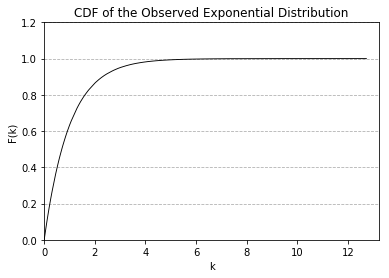

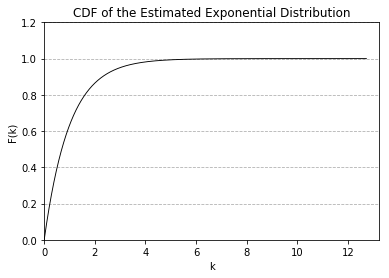

In [128]:
cdf_plotting(exp_observed, 'exponential')

### 2. Normal distribution

c:\users\phan nguyen vu (vpi)\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """


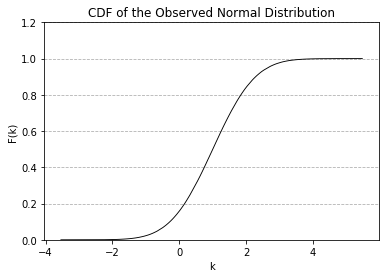

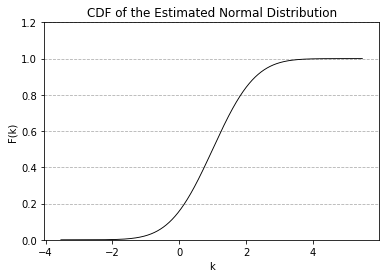

In [129]:
cdf_plotting(norm_observed, 'normal')

# PLOTTING DISCRETE CDF

In [100]:
def cdf_discrete_plotting(observed, estimated, occurence, name):
    observed_cdf = []
    estimated_cdf = []
    # Calculate the CDF
    observed_cdf.append(observed[0]/500000)
    estimated_cdf.append(estimated[0]/500000)
    for i in range(1, len(occurence)):
        observed_cdf.append(observed[i]/500000.0 + observed_cdf[i-1])
        estimated_cdf.append(estimated[i]/500000.0 + observed_cdf[i-1])
    
    ''' CDF of the observed data '''
    plt.figure(0)
    plt.scatter(occurence, observed_cdf, s=30, facecolors='', edgecolors='k')
    plt.scatter(occurence[1:10], observed_cdf[0:9], s=30, facecolors='k', edgecolors='k')
    plt.title('CDF of the Observed Data of ' + name.capitalize() + ' Distribution')
    plt.xlim([0, 10])
    plt.ylim([0, 1.08])
    plt.ylabel('F')
    plt.xlabel('Intervals')
    for i in range(10):
        plt.axhline(observed_cdf[i], i*0.1, i*0.1+0.1, linewidth = 1.2, color = 'k')
    plt.grid(which = 'both', linestyle='--', axis = 'y')
    plt.savefig('cdf_observed_' +name+ '.png', dpi=150)
    
    ''' CDF of the estimated data '''
    plt.figure(1)
    plt.scatter(occurence, estimated_cdf, s=30, facecolors='', edgecolors='k')
    plt.scatter(occurence[1:10], estimated_cdf[0:9], s=30, facecolors='k', edgecolors='k')
    plt.title('CDF of the Estimated Data of ' + name.capitalize() + ' Distribution')
    plt.xlim([0, 10])
    plt.ylim([0, 1.08])
    plt.ylabel('F')
    plt.xlabel('Intervals')
    for i in range(10):
        plt.axhline(estimated_cdf[i], i*0.1, i*0.1+0.1, linewidth = 1.2, color = 'k')
    plt.grid(which = 'both', linestyle='--', axis = 'y')
    plt.savefig('cdf_estimated_' +name+ '.png', dpi=150)

### 1. Poisson distribution

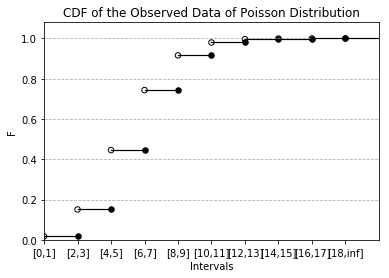

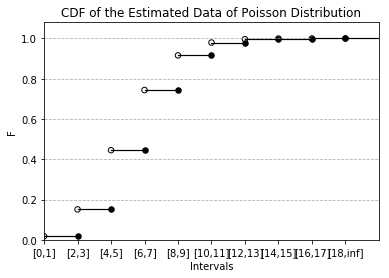

In [130]:
cdf_discrete_plotting(p_observation, p_estimation, ['[0,1]', '[2,3]', '[4,5]', '[6,7]', '[8,9]', '[10,11]', '[12,13]', '[14,15]', '[16,17]', '[18,inf]'], name = 'poisson')

### 2. Geometric distribution

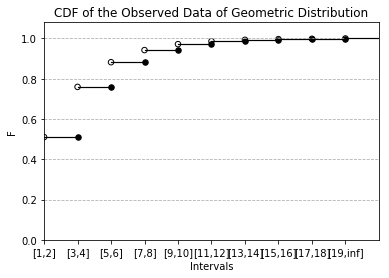

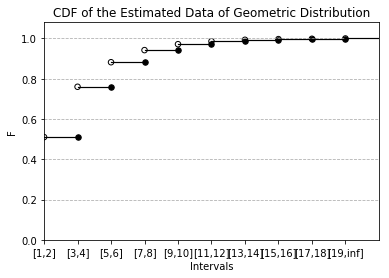

In [131]:
cdf_discrete_plotting(geo_observation, geo_estimation, ['[1,2]', '[3,4]', '[5,6]', '[7,8]', '[9,10]', '[11,12]', '[13,14]', '[15,16]', '[17,18]', '[19,inf]'], name = 'geometric')

### 3. Binomial distribution

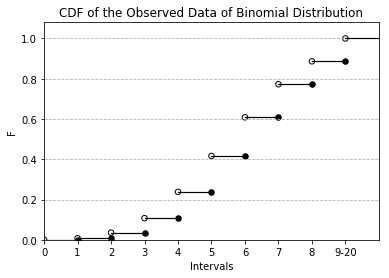

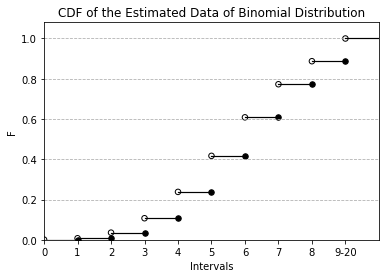

In [132]:
cdf_discrete_plotting(bino_observation, bino_estimation, ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9-20'], name = 'binomial')